In [2]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date
# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
prcp_query

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_query, columns=['date', 'precipitation'])
prcp_df

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('date')
prcp_df





,date,precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


In [12]:
# drop nan using dropna
prcp_df.dropna(inplace=True)
prcp_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2015 non-null   object 
 1   precipitation  2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.2+ KB


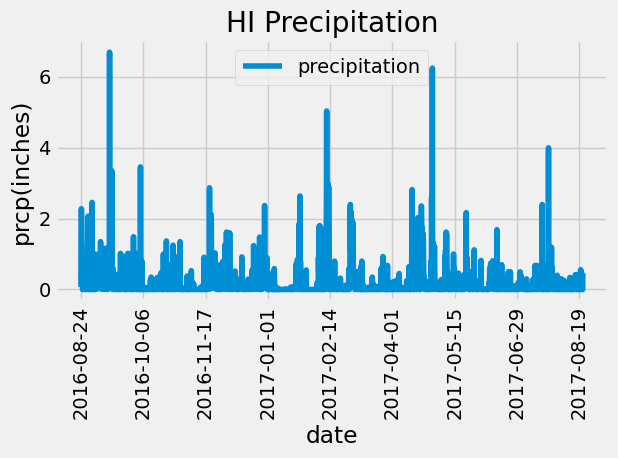

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='precipitation', rot=90)

# add title, y label
plt.title("HI Precipitation")
plt.ylabel('prcp(inches)')
plt.tight_layout()
plt.savefig("../Images/HI_precp.png")
plt.show()


In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
# using describe()
prcp_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).all()
total_stations

# get count
count_of_stations = session.query(func.count(Station.station)).first()[0]
count_of_stations


9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
station_activity
          


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity[0]
most_active_station

# get lowest, highest, average temp use sel technique
highest_temp = session.query(func.max(Measurement.tobs)).all()[0][0]
highest_temp

average_temp = session.query(func.avg(Measurement.tobs)).all()[0][0]
average_temp

lowest_temp = session.query(func.min(Measurement.tobs)).all()[0][0]
lowest_temp

53.0

In [18]:
# sel technique
sel = [func.max(Measurement.tobs),
       func.avg(Measurement.tobs),
       func.min(Measurement.tobs)]

temp_stats = session.query(*sel).\
                  filter(Measurement.station == 'USC00519281').all()
temp_stats

[(85.0, 71.66378066378067, 54.0)]

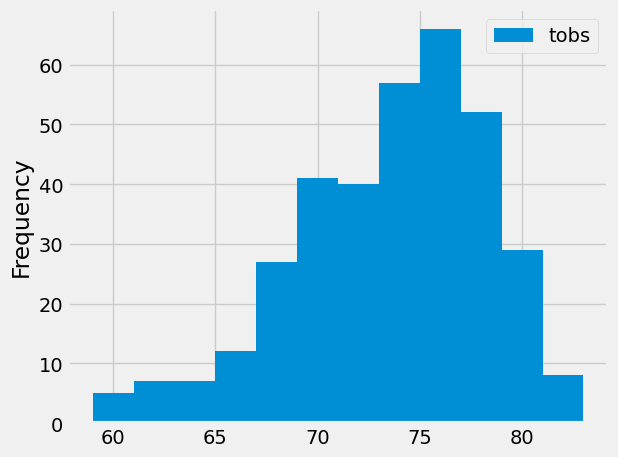

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_query = session.query(Measurement.tobs).\
                             filter(Measurement.station == 'USC00519281').\
                             filter(Measurement.date >= year_ago).all()
most_active_station_query

# Create DataFrame
tobs_df = pd.DataFrame(most_active_station_query)
tobs_df

# Make a hist
tobs_df.plot.hist(bins=12)

plt.tight_layout()
plt.savefig("../Images/HI_tobs.png")

plt.show()


# Close Session

In [20]:
# Close Session
session.close()